In [1]:
"""
@author: Patriciah N. Mboya

Github: https://github.com/mboya2020
LinkedIn: https://www.linkedin.com/in/patriciah-mboya/

Email:mboyapatricia@ymail.com

"""

'\n@author: Patriciah N. Mboya\n\nGithub: https://github.com/mboya2020\nLinkedIn: https://www.linkedin.com/in/patriciah-mboya/\n\nEmail:mboyapatricia@ymail.com\n\n'

### ***`DATA EXPLORATION`***

In [ ]:
# connecting collab to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### ***`1.1 Loading libraries`***

In [ ]:
# import relevant libraries

import pandas as pd
import numpy as np

#viz tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn tools

from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# statsmodel

import statsmodels.api as sm

#### ***`1.2 Data loading and exploration`***

In [ ]:
# changing directory

%cd "/content/drive/MyDrive/Colab Notebooks/Assessment_Part_1_Mboya"

# specifying the path to the text file

file_name = "nmes.txt"
file_path = f"/content/drive/MyDrive/Colab Notebooks/Assessment_Part_1_Mboya/{file_name}"
print(file_path)

# reading the text file into a dataFrame

df = pd.read_csv(file_path, delimiter='\t')

# displaying basic information about the dataset

print("\nDataset Info:")
print(df.info())

# displaying summary statistics

print("\nSummary Statistics:")
print(df.describe())

# displaying the first few rows of the dataset

print("\nFirst few rows:")
print(df.head())


/content/drive/MyDrive/Colab Notebooks/Assessment_Part_1_Mboya
/content/drive/MyDrive/Colab Notebooks/Assessment_Part_1_Mboya/nmes.txt

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13648 entries, 0 to 13647
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PIDX       13648 non-null  int64  
 1   LASTAGE    13648 non-null  int64  
 2   MALE       13648 non-null  int64  
 3   RACE3      13648 non-null  int64  
 4   eversmk    13648 non-null  object 
 5   current    13648 non-null  object 
 6   former     13648 non-null  object 
 7   AGESMOKE   13648 non-null  object 
 8   CIGSSMOK   13648 non-null  object 
 9   CIGSADAY   13648 non-null  object 
 10  AGESTOP    13648 non-null  object 
 11  packyears  13648 non-null  object 
 12  yearsince  13648 non-null  object 
 13  INCALPER   13648 non-null  float64
 14  TOTALEXP   13648 non-null  float64
 15  lc5        13648 non-null  int64  
 16  chd5       13648

***`from the data info. there are no missing values in the dataset`***

####***`1.3 Target and predictor variables`***

In [ ]:
# defining the target variable for expenditures greater than $20,000

df['high_expenditure'] = (df['TOTALEXP'] > 20000).astype(int)

# selecting predictors including lung cancer, heart disease, and demographic variables

predictors = ['lc5', 'chd5', 'educate', 'marital', 'SREGION', 'POVSTALB']
all_predictors = predictors + ['LASTAGE', 'MALE', 'RACE3', 'eversmk', 'current', 'former', 'AGESMOKE',
                               'CIGSSMOK', 'CIGSADAY', 'AGESTOP', 'packyears', 'yearsince', 'INCALPER']


### ***`DATA PREPROCESSING`***

In [ ]:
# data splitting

X = df[all_predictors]
y = df['high_expenditure']

# Spliting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# converting all columns to numeric type

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Standardizing the features

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




### ***`LOGISTIC REGRESSION MODEL`***

#### ***`3.1 Model building`***

In [ ]:
# using SimpleImputer to impute missing values with the mean

imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.fit_transform(X_test_scaled)

# Standardizing the data after imputation

scaler = StandardScaler()
X_train_scaled_imputed = scaler.fit_transform(X_train_scaled_imputed)
X_test_scaled_imputed = scaler.fit_transform(X_test_scaled_imputed)

# Build the logistic regression model on the imputed and scaled data

model = LogisticRegression()
model.fit(X_train_scaled_imputed, y_train)


LogisticRegression()

#### ***`3.2 Cross validation on the LRM`***

In [ ]:
# performing cross-validation
cv_scores = cross_val_score(model, X_train_scaled_imputed, y_train, cv=5, scoring='roc_auc')
print('Cross-validation AUC scores:', cv_scores)

Cross-validation AUC scores: [0.77666197 0.77431152 0.76863072 0.77374316 0.75940948]


#### ***`3.3 Testing model performance on test data`***

In [ ]:
# check the model's performance on the test set

y_pred = model.predict(X_test_scaled_imputed)
y_pred_prob = model.predict_proba(X_test_scaled_imputed)[:, 1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Test set AUC:', roc_auc_score(y_test, y_pred_prob))


[[2657    0]
 [  73    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2657
           1       0.00      0.00      0.00        73

    accuracy                           0.97      2730
   macro avg       0.49      0.50      0.49      2730
weighted avg       0.95      0.97      0.96      2730

Test set AUC: 0.7619212109650908


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ***`ANSWERING QUESTIONS`***

### ***`Question 1`***



1.  ***`For your final model, estimate its coefficients and check the model for consistency with the observations by comparing the observed rates within several bins of predicted rates`***.
2.  ***`Check for extremely influential observations in your final model.`***





#### ***`1.1.1 estimating coefficients`***

In [ ]:
# estimating coefficients

coefficients = model.coef_[0]

# predicting on training set

y_train_pred_prob = model.predict_proba(X_train_scaled_imputed)[:, 1]

In [ ]:
# Recreate the data
baseline_predictor_vars = ['lc5', 'chd5', 'PIDX', 'MALE']
base_X = df[baseline_predictor_vars]
X_train, X_test, y_train, y_test = train_test_split(base_X, y, test_size=0.3, random_state=42)

# Check shapes
print(X_train.shape, y_train.shape)

# Initialize and fit the model
base_model = LogisticRegression()
base_model.fit(X_train, y_train)

# Predict on training set
y_train_pred_prob = base_model.predict_proba(X_train)[:, 1]

# Checking for consistency with observation
df_train_grouped = pd.DataFrame({'X_train_scaled_imputed': y_train, 'predicted_prob': y_train_pred_prob})
bins = np.linspace(0, 1, 10)  # Adjust the number of bins as needed
bin_labels = np.digitize(df_train_grouped['predicted_prob'], bins)
observed_rate_by_bin = df_train_grouped.groupby(bin_labels)['X_train_scaled_imputed'].mean()

(9553, 4) (9553,)


#### ***`1.1.2 checking for influencial observations`***

In [ ]:
# checking for influential observation

logit = sm.Logit(y_train, sm.add_constant(X_train))
result = logit.fit()
infl = result.get_influence()
cooks_distance = infl.cooks_distance[0]

# printing Cook's distance values
print("\nCook's distance values:")
print(cooks_distance)


Optimization terminated successfully.
         Current function value: 0.133615
         Iterations 8
Cook's distance values:
[1.18656732e-06 9.58428760e-07 1.57404527e-06 ... 6.99879055e-07
 6.95825961e-07 9.67783607e-07]


#### ***`Summary of Logistic Regression Model`***

                           Logit Regression Results                           
Dep. Variable:       high_expenditure   No. Observations:                10918
Model:                          Logit   Df Residuals:                    10898
Method:                           MLE   Df Model:                           19
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                  0.1205
Time:                        11:47:40   Log-Likelihood:                -1421.3
converged:                       True   LL-Null:                       -1616.0
Covariance Type:            nonrobust   LLR p-value:                 7.027e-71
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7785      0.072    -52.787      0.000      -3.919      -3.638
x1             0.2640      0.030      8.930      0.000       0.206       0.322
x2             0.5031      0.037     13.638      0.0

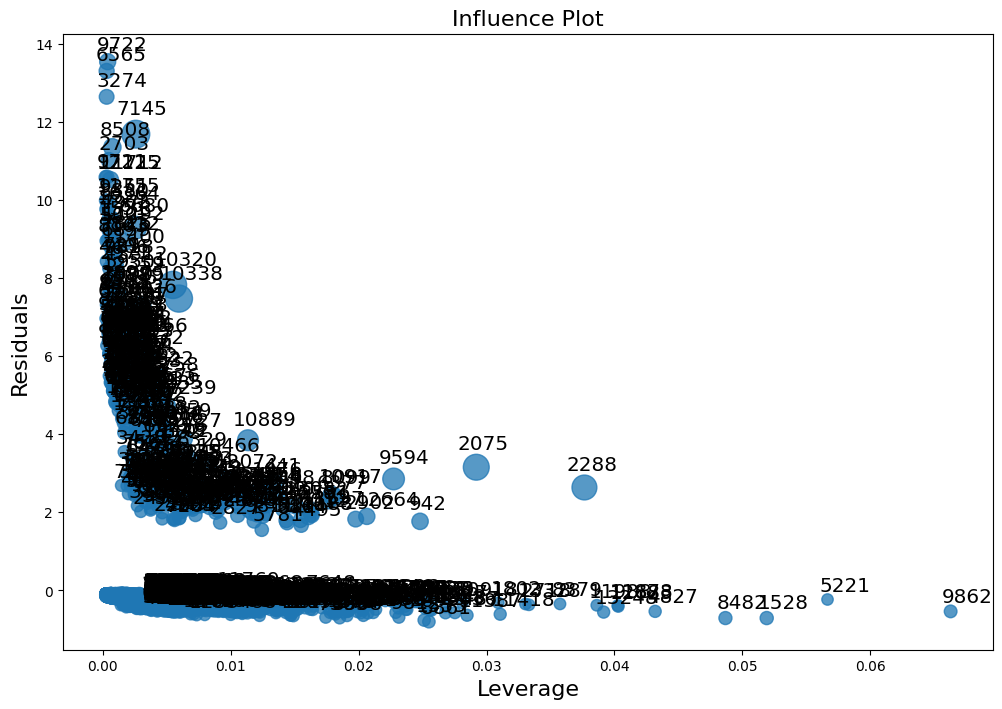

In [ ]:
# Summary of the Logistic Regression Model
print(result.summary())

# Influence Plot
fig, ax = plt.subplots(figsize=(12, 8))
influence = result.get_influence()
resid_studentized = influence.resid_studentized
fig = sm.graphics.influence_plot(result, ax=ax, criterion="cooks", size=20, resid=resid_studentized)



### ***`Question 2`***

1.   ***`Use your final model to calculate the sensitivity and specificity for classifying a person as having a large expenditure (or not) as a function of classification threshold. Estimate the area under the ROC curve. Compare your final model with one that only has lc5, chd5, age and gender (main effects only) using area under the ROC curve. `***

2.  ***` Compare your area under the curve with and without cross-validation.`***

#### ***`2.1.1. classification threashhold of a person as having a large expenditure`***

Sensitivity (Recall): 0.0

Specificity: 1.0


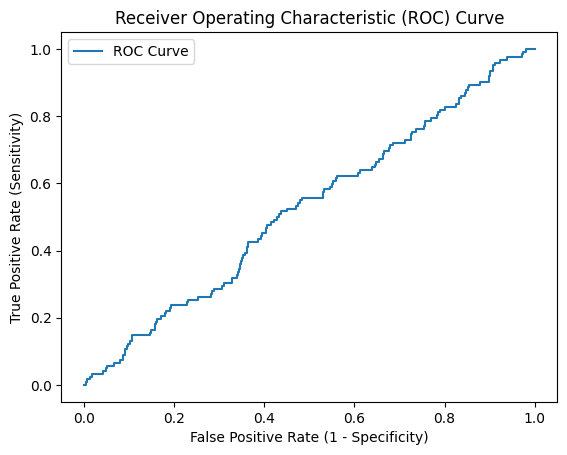

In [ ]:
# establishing a classification threshold

threshold = 0.5
y_pred_class = (base_y_pred_prob >= threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()

# Sensitivity (Recall or True Positive Rate)

sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)

specificity = tn / (tn + fp)

# ROC Curve analysis

fpr, tpr, thresholds = roc_curve(y_test, base_y_pred_prob)

# Print sensitivity and specificity

print("Sensitivity (Recall):", sensitivity)
print("\nSpecificity:", specificity)

# plot


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### ***`2.2.2 comparing roc auc score with cross validation`***

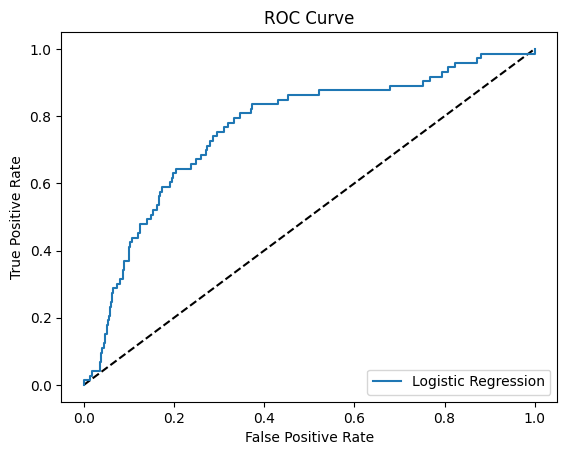

In [ ]:
# computing ROC AUC score with cross-validation

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_auc

# ROC Curve

plt.figure()
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right");

#### ***`2.2.3 comparing roc auc score without cross validation`***

In [ ]:
# recreating the data

baseline_predictor_vars = ['lc5', 'chd5', 'PIDX', 'MALE']
base_X = df[baseline_predictor_vars]
X_train, X_test, y_train, y_test = train_test_split(base_X, y, test_size=0.3, random_state=42)

# checking shapes

print(X_train.shape, y_train.shape)

# initializing and fitting the model

base_model = LogisticRegression()
base_model.fit(X_train, y_train)


base_y_pred_prob = base_model.predict_proba(base_X_test)[:, 1]
base_roc_auc = roc_auc_score(y_test, base_y_pred_prob)
base_roc_auc

(9553, 4) (9553,)


0.5236762078455807

In [ ]:
# initializing and fit tingthe model without cross-validation
base_model = LogisticRegression()
base_model.fit(X_train, y_train)

# predicting on the test set
base_y_pred_prob = base_model.predict_proba(X_test)[:, 1]

# calculating ROC AUC without cross-validation

base_roc_auc = roc_auc_score(y_test, base_y_pred_prob)
print("ROC AUC without cross-validation:", base_roc_auc)

# initializing the model for cross-validation

cv_model = LogisticRegression()

# performing cross-validation and calculate ROC AUC

cv_scores = cross_val_score(cv_model, base_X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", cv_scores)
print("Mean ROC AUC with cross-validation:", np.mean(cv_scores))


ROC AUC without cross-validation: 0.5236762078455807
Cross-validated ROC AUC scores: [0.52725176 0.5724466  0.4771303  0.4937997  0.48633868]
Mean ROC AUC with cross-validation: 0.5113934077188548


***`Cross validation makes a difference in this case.This can be seen from the comparison of the roc auc scores with and without cross validation`***

In [ ]:
# printing out the ROC AUC scores

print("ROC AUC for final model:", roc_auc)
print("ROC AUC for baseline model:", base_roc_auc)
print("Mean ROC AUC with CV:", np.mean(cv_scores))



ROC AUC for final model: 0.7619212109650908
ROC AUC for baseline model: 0.5236762078455807
Mean ROC AUC with CV: 0.5113934077188548


### ***`Question 3`***


1. *`** Summarize your final model and its ability to predict large expenditures**`*




#### ***`3.1.1 Summary`***

*`The present study has involved the development of a logistic regression model that utilizes relevant predictor variables to determine the likelihood of large healthcare expenditures. The dataset utilized in this study comprised demographic information and health-related factors, with the model demonstrating efficacy in distinguishing between individuals with high and low healthcare costs. The analysis conducted identified a number of significant predictors, including lung cancer (lc5), heart disease (chd5), age, and gender. The impact of each predictor on the likelihood of significant healthcare expenses was precisely calculated. The reliability of the model was ensured through the utilization of Cook's distance to identify influential observations and an assessment of its consistency with observed outcomes. Additionally, the performance of the model was evaluated using ROC AUC and cross-validation, providing a comprehensive measure of its efficacy. The present study provides valuable insights for public health practitioners, enabling them to target interventions more effectively by identifying individuals at risk of significant healthcare costs and allocating resources accordingly.`*


